<a href="https://colab.research.google.com/github/UmapriyaSR/Pet-Classification/blob/main/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds


In [44]:
dataset,data_info=tfds.load('malaria',with_info='True',as_supervised=True,shuffle_files=True,split=['train'])

In [45]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [46]:
#for data in dataset['train'].take(5):
  #print(data)

In [47]:
# train_ratio=0.6
# val_ratio=0.2
# test_ratio=0.2
# dataset=tf.data.Dataset.range(10)
# print(list(dataset.as_numpy_iterator()))
# dataset_size=(len(dataset))
# train_dataset=dataset.take(int(train_ratio*dataset_size))
# print(list(train_dataset.as_numpy_iterator()))

# val_test_dataset=dataset.skip(int(train_ratio*dataset_size))
# val_dataset=val_test_dataset.take(int(val_ratio*dataset_size))
# print(list(val_dataset.as_numpy_iterator()))

# test_dataset=val_test_dataset.skip(int(val_ratio*dataset_size))
# #test_dataset=test_test_dataset.take(int(test_ratio*dataset_size))
# print(list(test_dataset.as_numpy_iterator()))

In [48]:
def splits(dataset,train_ratio,val_ratio,test_ratio):
  dataset_size=(len(dataset))
  train_dataset=dataset.take(int(train_ratio*dataset_size))
  val_test_dataset=dataset.skip(int(train_ratio*dataset_size))
  val_dataset=val_test_dataset.take(int(val_ratio*dataset_size))
  test_dataset=val_test_dataset.skip(int(val_ratio*dataset_size))
  return train_dataset,val_dataset,test_dataset

In [49]:
train_ratio=0.6
val_ratio=0.2
test_ratio=0.2
#dataset=tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset=splits(dataset[0],train_ratio,val_ratio,test_ratio)
print(list(test_dataset.take(1).as_numpy_iterator()))
print(list(train_dataset.take(1).as_numpy_iterator()))
print(list(val_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 0)]
[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

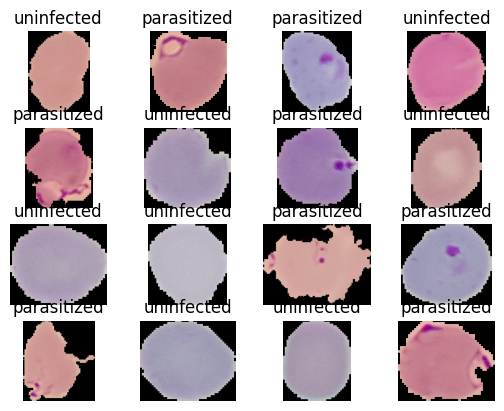

In [50]:
for i,(image,label) in enumerate(train_dataset.take(16)):
  ax=plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(data_info.features['label'].int2str(label))
  plt.axis('off')

In [51]:
im_size=224
def resizing(image,label):
  return tf.image.resize(image,(im_size,im_size))/255,label

In [52]:
train_dataset=train_dataset.map(resizing)
val_dataset=val_dataset.map(resizing)
test_dataset=test_dataset.map(resizing)

In [53]:
for image,label in train_dataset.take(1):
  print (image,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [54]:
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration=True ).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size = 8,reshuffle_each_iteration=True ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [55]:
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization

In [56]:
#train_dataset =tf.expand_dims(train_dataset, axis=0)

In [57]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape = (im_size,im_size,3)),
    Conv2D(filters=6,kernel_size=5,strides=(1, 1),padding='valid',activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16,kernel_size=5,strides=(1, 1),padding='valid',activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(100,activation = "relu"),
    BatchNormalization(),
    Dense(10,activation = "relu"),
    BatchNormalization(),
    Dense(1,activation = "sigmoid")
])
lenet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 6)       456       
                                                                 
 batch_normalization_4 (Bat  (None, 220, 220, 6)       24        
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 6)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_5 (Bat  (None, 106, 106, 16)      64        
 chNormalization)                                                
                                                      

In [58]:
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [59]:
lenet_model.compile(optimizer=Adam(learning_rate=0.01),loss=BinaryCrossentropy(),metrics='accuracy')

In [60]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [61]:
history=lenet_model.fit(train_dataset,validation_data=val_dataset,epochs=10,verbose=1)

Epoch 1/10
517/517 [==============================] - 47s 86ms/step - loss: 0.3751 - accuracy: 0.8328 - val_loss: 0.2523 - val_accuracy: 0.9272
Epoch 2/10
517/517 [==============================] - 40s 78ms/step - loss: 0.1949 - accuracy: 0.9337 - val_loss: 0.1888 - val_accuracy: 0.9301
Epoch 3/10
517/517 [==============================] - 36s 69ms/step - loss: 0.1830 - accuracy: 0.9413 - val_loss: 0.4051 - val_accuracy: 0.8951
Epoch 4/10
517/517 [==============================] - 36s 69ms/step - loss: 0.1552 - accuracy: 0.9503 - val_loss: 0.1949 - val_accuracy: 0.9350
Epoch 5/10
517/517 [==============================] - 44s 85ms/step - loss: 0.1672 - accuracy: 0.9451 - val_loss: 0.6249 - val_accuracy: 0.6398
Epoch 6/10
517/517 [==============================] - 38s 73ms/step - loss: 0.1649 - accuracy: 0.9452 - val_loss: 0.1692 - val_accuracy: 0.9463
Epoch 7/10
517/517 [==============================] - 35s 68ms/step - loss: 0.1327 - accuracy: 0.9568 - val_loss: 0.1755 - val_accuracy:

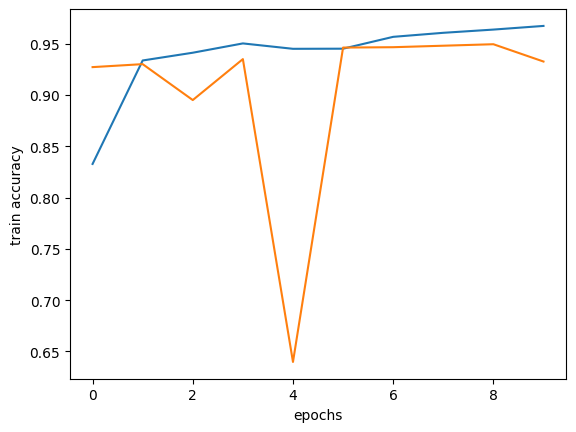

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("train accuracy")
plt.show()

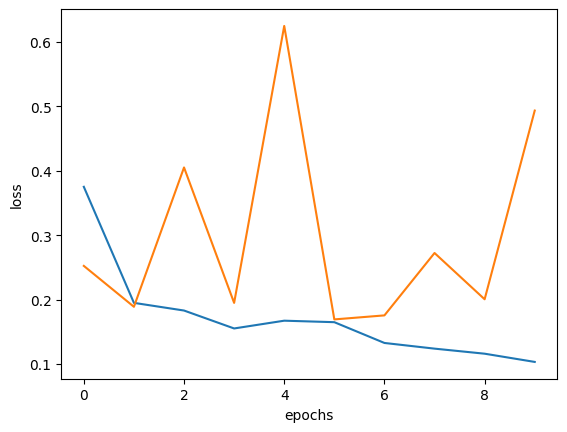

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [64]:
test_dataset=test_dataset.batch(1)
lenet_model.evaluate(test_dataset)

5513/5513 [==============================] - 32s 4ms/step - loss: 0.4480 - accuracy: 0.9352


[0.4480123817920685, 0.9352439641952515]

In [65]:
parasite_or_not(lenet_model.predict(test_dataset.take(7))[0][0])

7/7 [==============================] - 9s 4ms/step


'U'

In [66]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 19ms/step


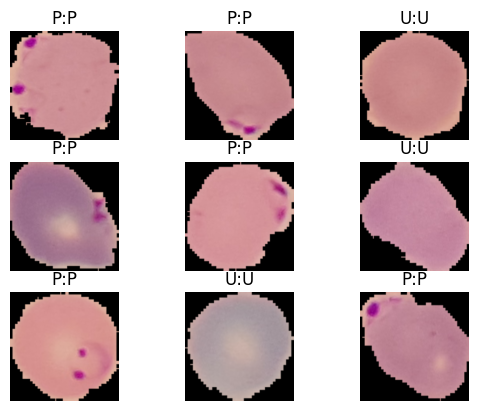

In [67]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(lenet_model.predict(image)[0][0])))

  plt.axis('off')